<a href="https://colab.research.google.com/github/lphuong304/CS114.L21/blob/main/L%E1%BA%ADp%20tr%C3%ACnh%20Python/assignments%204%20.1/tho_sua_ong_nuoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Người đóng góp: Nguyễn Ngọc Lan Phương*
## ĐỀ BÀI
Đường ống nước được ghép từ nhiều đoạn trong đó mỗi đoạn thuộc một trong 7 loại sau

* 1 : ống dọc

* 2 : ống ngang

* 3 – 6 : Ổng rẽ hướng

* 7 : Ống giao nhau (Dùng để nối 02 đường ống riêng rẽ cắt nhau)

Bức hình sau minh họa cho 7 loại ống theo thứ từ từ 1 đến 7:

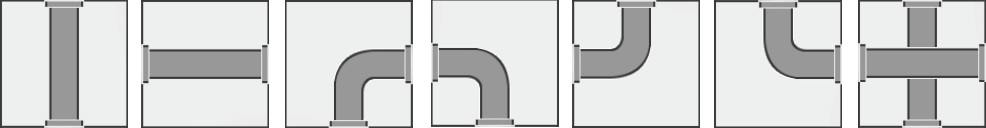


Một trạm bơm có thể kết nối với tối đa 4 đường ống dẫn đi 4 hướng xung quanh. Trên bản đồ, trạm bơm được đánh dấu bằng chữ cái in hoa. Mỗi trạm bơm phải bơm nước đến tối đa 4 hồ chứa, được đánh dấu bằng chữ cái in thường tương ứng.

Hệ thống đường ống phải kết nối trạm bơm tới hồ chứa tương ứng và không bị rò rỉ. Bạn hãy viết chương trình kiểm tra hệ thống đường ống này.

## INPUT
Dòng đầu tiên chứa số N, đây là số hàng trong bản đồ đường ống.

N dòng tiếp theo, mỗi dòng chứa một chuỗi ký tự. Các chuỗi ký tự này hợp thành bản đồ đường ống nước, mỗi ký tự đại diện cho một ô trên bản đồ.

## OUTPUT

Nếu hệ thống đường ống kết nối được các trạm bơm tới các bể chứa tương ứng, xuất ra số ô thật sự có nước chảy qua khi hệ thống hoạt động

Nếu hệ thống không kết nối được các trạm bơm và bể chứa, xuất ra số -X. Trong đó X là số lượng các ô đã có nước chảy qua TRƯỚC KHI chỗ rò rỉ đầu tiên xảy ra hoặc nước chảy đến một bể chưa không tương ứng với trạm bơm.


* *Ý tưởng*: Em thao khảo từ nguồn - [pipes game](https://codereview.stackexchange.com/questions/178772/codefights-pipes-game?fbclid=IwAR1pVSWrfu8_N2aNpoXCszKAmb7jk4NjHd5AYSDO5IvFnU9cmdmqrzo2uKM)


In [2]:
#cre: https://codereview.stackexchange.com/
DIRECTION = {
             'l': (0, -1),
             'r': (0, 1),
             'u': (-1, 0),
             'd': (1, 0)
            }

FLOW = {
        'l': {'2': 'l', '3': 'd', '6': 'u', '7': 'l'},
        'r': {'2': 'r', '4': 'd', '5': 'u', '7': 'r'},
        'd': {'1': 'd', '5': 'l', '6': 'r', '7': 'd'},
        'u': {'1': 'u', '3': 'r', '4': 'l', '7': 'u'}
       }

_IN_RANGE = lambda x, y, state: 0<=x<len(state) and 0<=y<len(state[0])

def find_starting_points(state):
    """Finds the starting nodes of the state"""
    pipes = list(filter(lambda x: 'a'<=x<='z',''.join(state)))
    starts = {}

    for i in range(len(state)):
        for j in range(len(state[0])):
            if 'a'<=state[i][j]<='z':
                starts[state[i][j]] = [i,j]

    return starts, pipes

def follow_flow(flow, current_path, state, end, final_path):
    """Recursive function that follows the flow of the pipe"""
    x, y = [x+y for x,y in zip(current_path[-1], DIRECTION[flow])]

    if _IN_RANGE(x, y, state) and state[x][y] == end:
        final_path.append(current_path + [''])
    elif _IN_RANGE(x, y, state) and state[x][y] in FLOW[flow]:
        return follow_flow(FLOW[flow][state[x][y]], current_path + [[x, y]], state, end, final_path)
    else:
        final_path.append(current_path + ['leak'])

    return final_path

def sum_water(total_path):
    """"Sums the water flowed if leakage found return sum * -1"""
    final_cells = set()
    first_leak = list(map(lambda x: len(x), filter(lambda x: 'leak' in x, total_path)))
    first_leak = 0 if len(first_leak) == 0 else min(first_leak) - 1

    for path in total_path:
        path = path[:-1]
        path = list(map(lambda x: str(x[0]) + ' ' + str(x[1]), path))
        idx = min(first_leak, len(path)) if first_leak else len(path)
        final_cells |= set(path[:idx])

    return len(final_cells) * (-1 if first_leak > 0 else 1)

def pipesGame(state):
    """"Main CodeFights function"""
    starts, pipes = find_starting_points(state)
    total_path = []

    for pipe in pipes:
        end = pipe.upper()
        for di in DIRECTION:
            x, y = [x+y for x,y in zip(starts[pipe], DIRECTION[di])]
            if _IN_RANGE(x, y, state) and state[x][y] in FLOW[di]:
                total_path += follow_flow(FLOW[di][state[x][y]], [[x, y]], state, end, [])

    return sum_water(total_path)

if __name__ == '__main__':
    n=int(input())
    lst_pipes=[]
    tmp=[]
    for i in range(n):
        tmp=input()
        lst_pipes.append(tmp)
    print(pipesGame(lst_pipes))

5
a224C22300000
0001643722B00
0b27275100000
00c7256500000
0006A45000000
19
